In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('../datasets/pokemonGo/processed_pokemon_go.csv', low_memory=False)

In [2]:
features = data.drop(['class'],1).as_matrix()

labels = data['class'].as_matrix()
feature_names = list( data.drop(['class'],1))
print feature_names
print "Number of features: %d" %len(feature_names)

['Unnamed: 0', 'latitude', 'longitude', 'appearedTimeOfDay', 'terrainType', 'closeToWater', 'temperature', 'windSpeed', 'pressure', 'sunriseMinutesMidnight', 'sunriseMinutesSince', 'sunsetMinutesMidnight', 'sunsetMinutesBefore', 'Urbanity', 'gymDistanceKm', 'pokestopDistanceKm', 'cooc_1', 'cooc_2', 'cooc_3', 'cooc_4', 'cooc_5', 'cooc_6', 'cooc_7', 'cooc_8', 'cooc_9', 'cooc_10', 'cooc_11', 'cooc_12', 'cooc_13', 'cooc_14', 'cooc_15', 'cooc_16', 'cooc_17', 'cooc_18', 'cooc_19', 'cooc_20', 'cooc_21', 'cooc_22', 'cooc_23', 'cooc_24', 'cooc_25', 'cooc_26', 'cooc_27', 'cooc_28', 'cooc_29', 'cooc_30', 'cooc_31', 'cooc_32', 'cooc_33', 'cooc_34', 'cooc_35', 'cooc_36', 'cooc_37', 'cooc_38', 'cooc_39', 'cooc_40', 'cooc_41', 'cooc_42', 'cooc_43', 'cooc_44', 'cooc_45', 'cooc_46', 'cooc_47', 'cooc_48', 'cooc_49', 'cooc_50', 'cooc_51', 'cooc_52', 'cooc_53', 'cooc_54', 'cooc_55', 'cooc_56', 'cooc_57', 'cooc_58', 'cooc_59', 'cooc_60', 'cooc_61', 'cooc_62', 'cooc_63', 'cooc_64', 'cooc_65', 'cooc_66', 'co

In [3]:
N = 10000

labels = labels[:N]
features = features[:N]

In [9]:
ID = 16

# Vi ønsker likt antall pidgey og not pidgey, så vi plukker bare noen av not pidgey dataene
print "Number of pidgeys", (labels==ID).sum()



pidgey = labels == ID
not_pidgey = labels != ID

N = len(labels)
idx = np.arange(N)

num_pidgeys = pidgey.sum()
random_subset = np.hstack([idx[pidgey],np.random.choice(idx[not_pidgey],num_pidgeys)])
print "number of data", len(random_subset)

balanced_data = features[random_subset]
balanced_labels = labels[random_subset]
balanced_labels = balanced_labels == ID

print balanced_data.shape
print balanced_labels.shape

Number of pidgeys 52109
number of data 104218
(104218L, 516L)
(104218L,)


In [10]:
from sklearn.model_selection import train_test_split
train_data, test_data,train_target,  test_target = train_test_split(balanced_data, balanced_labels, test_size=0.33, random_state=42)

print train_data.shape
print train_target.shape
print test_data.shape
print test_target.shape

(69826L, 516L)
(69826L,)
(34392L, 516L)
(34392L,)


In [11]:
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import confusion_matrix

clf = SVC()
clf.fit(train_data,train_target)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [12]:
predictions = clf.predict(test_data)
print "predicted labels"
print predictions
print "true labels"
print test_target

print "Accuracy score: %f" %(predictions==test_target).mean()
print confusion_matrix(test_target, predictions)

predicted labels
[False  True  True ...,  True  True False]
true labels
[False  True  True ..., False False  True]
Accuracy score: 0.551756
[[ 6786 10437]
 [ 4979 12190]]


Not very good results. Not any better than random guessing

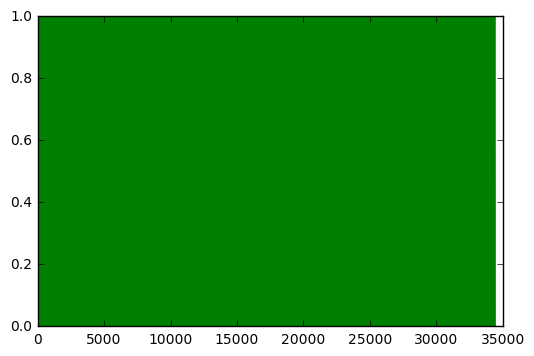